<a href="https://colab.research.google.com/github/sebascastellanos/Analitica1/blob/main/Proyectin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  # Para balancear clases si es necesario


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
ruta = "/content/drive/MyDrive/6to Semestre/Analitica/2do Corte/Telco-Customer-Churn-V2.csv"

In [5]:
import pandas as pd

df = pd.read_csv(ruta)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1.0,No,'No phone service',DSL,No,Yes,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.5,No
2,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,Male,No,No,No,45.0,No,'No phone service',DSL,Yes,No,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,1840.75,No
4,Female,No,No,No,2.0,Yes,No,'Fiber optic',No,No,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes


In [6]:
# Mostrar información general
print(df.info())

# Resumen estadístico de las variables numéricas
print(df.describe())

# Revisar valores nulos
print(df.isnull().sum())

# Revisar cantidad de valores únicos por variable
print(df.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        6959 non-null   object 
 4   tenure            6859 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    6881 non-null   object 
 9   OnlineBackup      6876 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       6881 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


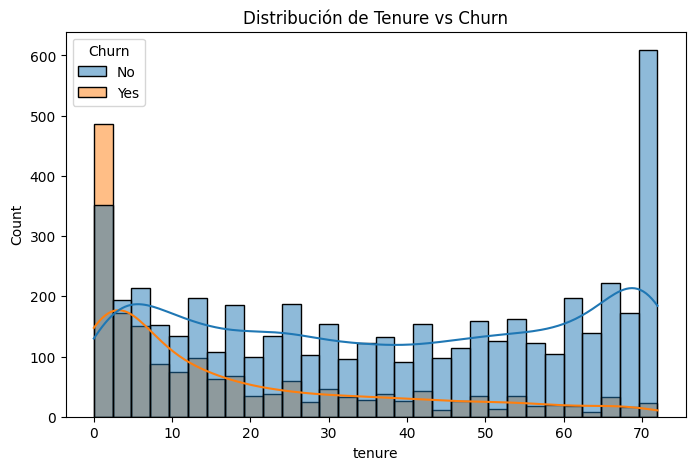

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="tenure", hue="Churn", kde=True, bins=30)
plt.title("Distribución de Tenure vs Churn")
plt.show()

<ipython-input-8-b313801f4cff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-8-b313801f4cff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-8-b313801f4cff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-8-b313801f4cff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-8-b313801f4cff>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. afte

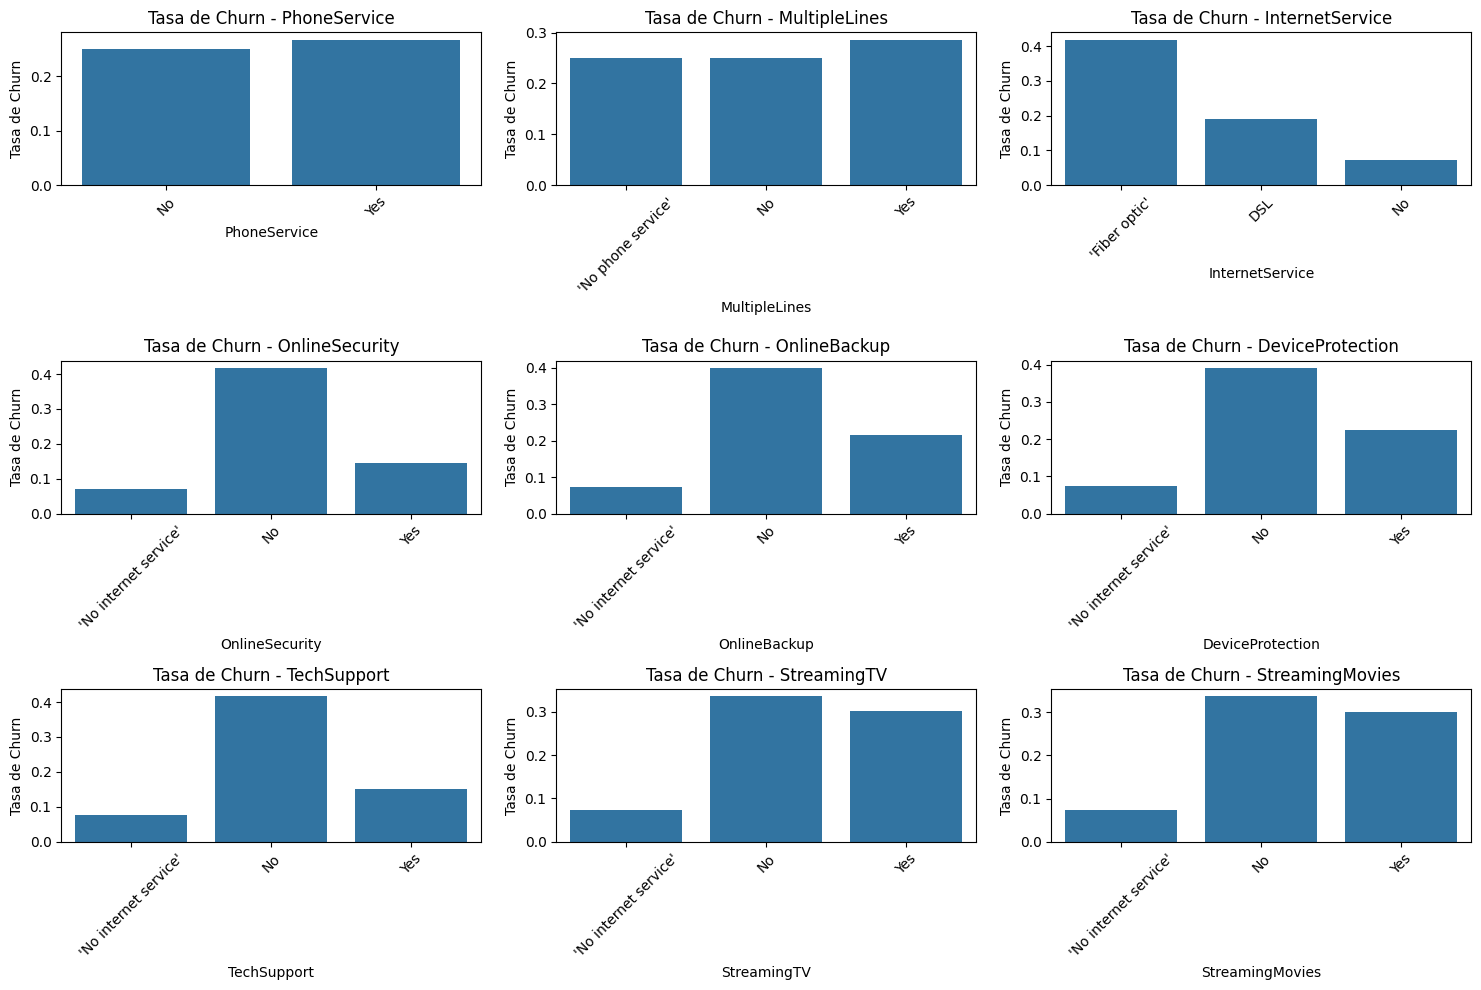

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir Churn a valores numéricos (Yes=1, No=0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Seleccionar columnas de servicio
service_columns = [
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]

# Calcular tasa de abandono por servicio
churn_rates = {service: df.groupby(service)["Churn"].mean() for service in service_columns}

# Graficar cada categoría de servicio
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, (service, churn_rate) in zip(axes, churn_rates.items()):
    sns.barplot(x=churn_rate.index, y=churn_rate.values, ax=ax)
    ax.set_title(f"Tasa de Churn - {service}")
    ax.set_ylabel("Tasa de Churn")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [9]:
# 1️⃣ Imputación de TotalCharges (convertir a numérico y calcular donde falte)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")  # Convertir a numérico
df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"], inplace=True)  # Imputar valores nulos

# 2️⃣ Eliminar valores nulos restantes
df.dropna(inplace=True)

# 3️⃣ Codificación de variables categóricas a binario (0 y 1)
df = pd.get_dummies(df, drop_first=True)

# 4️⃣ Eliminar columnas innecesarias (si hay ID de cliente)
if "customerID" in df.columns:
    df.drop(columns=["customerID"], inplace=True)

# 5️⃣ Verificar que está limpio
print(df.info())  # Ver tipos de datos
print(df.isnull().sum())  # Revisar valores nulos
print(df.head())  # Ver primeras filas


<class 'pandas.core.frame.DataFrame'>
Index: 6174 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   6174 non-null   float64
 1   MonthlyCharges                           6174 non-null   float64
 2   TotalCharges                             6174 non-null   float64
 3   Churn                                    6174 non-null   int64  
 4   gender_Male                              6174 non-null   bool   
 5   SeniorCitizen_Yes                        6174 non-null   bool   
 6   Partner_Yes                              6174 non-null   bool   
 7   Dependents_Yes                           6174 non-null   bool   
 8   PhoneService_Yes                         6174 non-null   bool   
 9   MultipleLines_No                         6174 non-null   bool   
 10  MultipleLines_Yes                        6174 non-nul

<ipython-input-9-a6e41a7240d4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"], inplace=True)  # Imputar valores nulos


In [10]:
df.head()


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_'Two year',Contract_Month-to-month,PaperlessBilling_Yes,PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,1.0,29.85,29.85,0,False,False,True,False,False,False,...,True,False,True,False,False,True,True,False,True,False
1,34.0,56.95,1889.50,0,True,False,False,False,True,True,...,True,False,True,False,False,False,False,False,False,True
2,2.0,53.85,108.15,1,True,False,False,False,True,True,...,True,False,True,False,False,True,True,False,False,True
3,45.0,42.30,1840.75,0,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,2.0,70.70,151.65,1,False,False,False,False,True,True,...,True,False,True,False,False,True,True,False,True,False


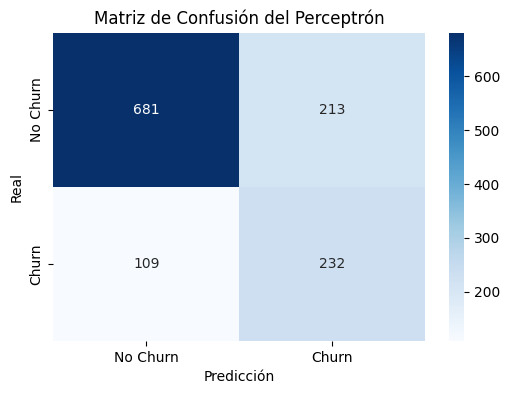

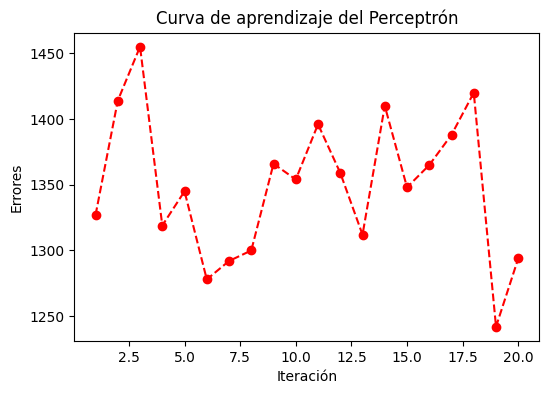

📌 Precisión del Perceptrón: 0.7393

📌 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       894
           1       0.52      0.68      0.59       341

    accuracy                           0.74      1235
   macro avg       0.69      0.72      0.70      1235
weighted avg       0.77      0.74      0.75      1235



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 🔹 1️⃣ Separar características (X) y variable objetivo (y)
X = df.drop(columns=["Churn"])  # Eliminar la columna objetivo
y = df["Churn"]  # Variable objetivo (0 = No churn, 1 = Yes churn)

# 🔹 2️⃣ Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 3️⃣ Escalar los datos para mejorar estabilidad del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 4️⃣ Entrenar el Perceptrón
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
errors = []  # Guardar errores en cada iteración

for _ in range(20):  # Entrenar varias veces para visualizar errores
    perceptron.partial_fit(X_train, y_train, classes=np.unique(y))
    errors.append((y_train != perceptron.predict(X_train)).sum())  # Contar errores

# 🔹 5️⃣ Predicciones
y_pred = perceptron.predict(X_test)

# 🔹 6️⃣ Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 🔹 7️⃣ Gráficos 📊

## 📌 Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión del Perceptrón")
plt.show()

## 📌 Curva de error en entrenamiento
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(errors) + 1), errors, marker='o', linestyle='--', color='red')
plt.xlabel("Iteración")
plt.ylabel("Errores")
plt.title("Curva de aprendizaje del Perceptrón")
plt.show()

# 🔹 8️⃣ Mostrar métricas finales
print(f"📌 Precisión del Perceptrón: {accuracy:.4f}\n")
print("📌 Reporte de clasificación:")
print(class_report)


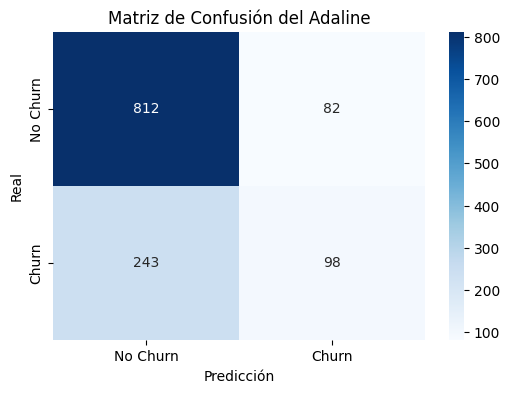

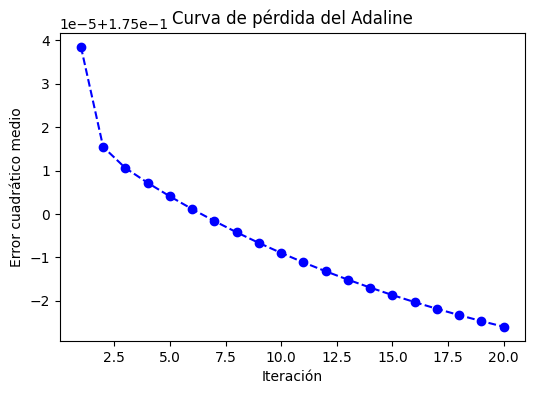

📌 Precisión del Adaline: 0.7368

📌 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       894
           1       0.54      0.29      0.38       341

    accuracy                           0.74      1235
   macro avg       0.66      0.60      0.60      1235
weighted avg       0.71      0.74      0.71      1235



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 🔹 1️⃣ Separar características (X) y variable objetivo (y)
X = df.drop(columns=["Churn"])  # Eliminar la columna objetivo
y = df["Churn"].values  # Convertir a array para compatibilidad

# 🔹 2️⃣ Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# 🔹 3️⃣ Escalar los datos para mejorar estabilidad del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 4️⃣ Entrenar el Adaline con descenso de gradiente estocástico
adaline = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant', random_state=42)
errors = []  # Guardar pérdida en cada iteración

for _ in range(20):  # Entrenar varias veces para visualizar errores
    adaline.partial_fit(X_train, y_train)  # Ajustar parcialmente con datos de entrenamiento
    predictions = adaline.predict(X_train)
    loss = np.mean((y_train - predictions) ** 2)  # Error cuadrático medio
    errors.append(loss)

# 🔹 5️⃣ Predicciones y umbral
threshold = 0.5  # Convertir salidas continuas en clasificación binaria
y_pred = (adaline.predict(X_test) >= threshold).astype(int)

# 🔹 6️⃣ Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 🔹 7️⃣ Gráficos 📊

## 📌 Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión del Adaline")
plt.show()

## 📌 Curva de pérdida en entrenamiento
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(errors) + 1), errors, marker='o', linestyle='--', color='blue')
plt.xlabel("Iteración")
plt.ylabel("Error cuadrático medio")
plt.title("Curva de pérdida del Adaline")
plt.show()

# 🔹 8️⃣ Mostrar métricas finales
print(f"📌 Precisión del Adaline: {accuracy:.4f}\n")
print("📌 Reporte de clasificación:")
print(class_report)

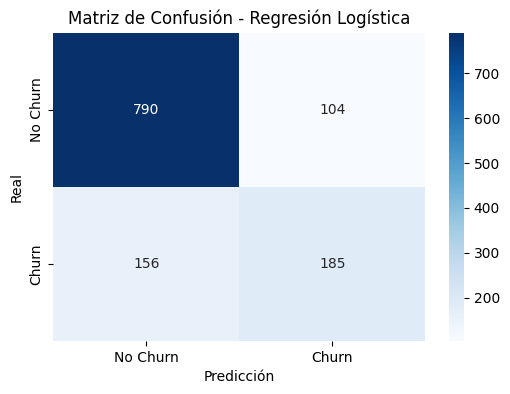

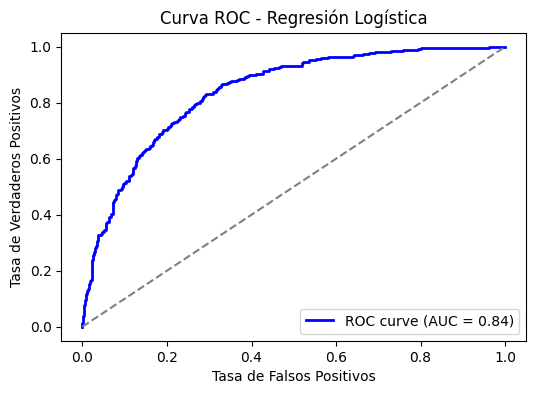

📌 Precisión de la Regresión Logística: 0.7895

📌 Reporte de clasificación:
📌 Mejor modelo: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       894
           1       0.64      0.54      0.59       341

    accuracy                           0.79      1235
   macro avg       0.74      0.71      0.72      1235
weighted avg       0.78      0.79      0.78      1235



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Separar características (X) y variable objetivo (y)
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir modelo y hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.show()

# Mostrar métricas finales
print(f"📌 Precisión de la Regresión Logística: {accuracy:.4f}\n")
print("📌 Reporte de clasificación:")
print(f"📌 Mejor modelo: {grid_search.best_params_}")
print(class_report)


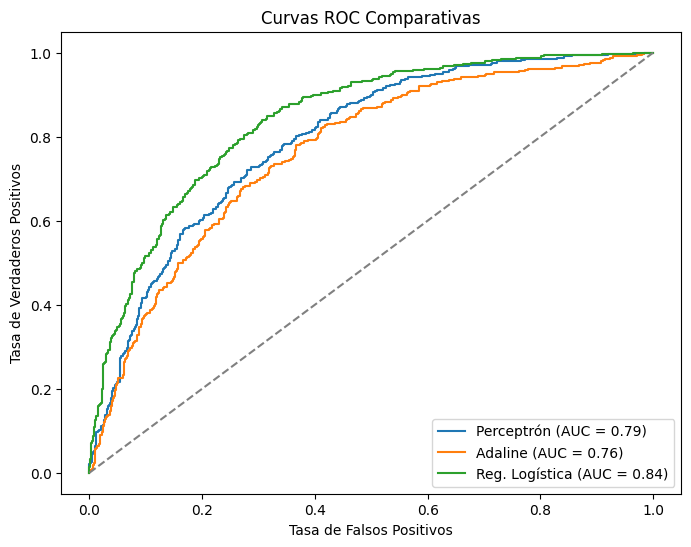


📌 Recall (Churn = Yes) por modelo:
Perceptrón: 0.6393
Adaline: 0.4516
Reg. Logística: 0.5367


<ipython-input-15-9f4ac2549632>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Feature", data=importancia_df, palette="viridis")


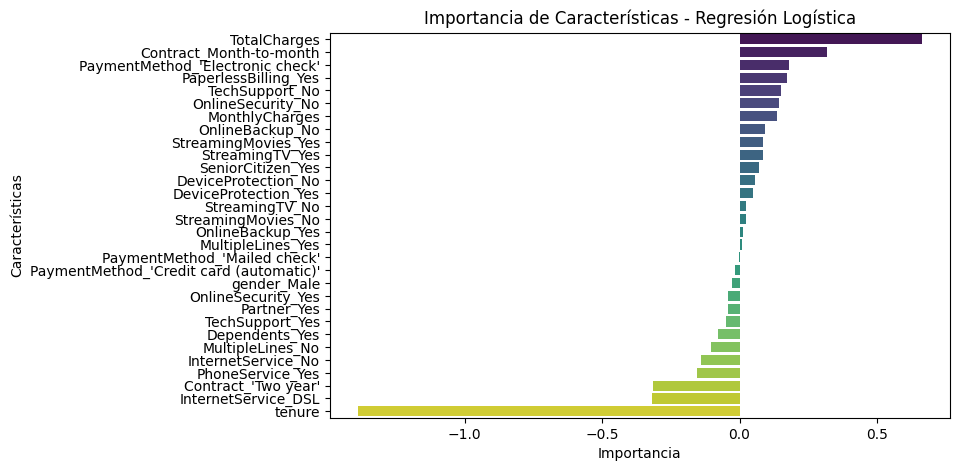

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, SGDRegressor, LogisticRegression
from sklearn.metrics import recall_score, roc_curve, auc


# 🔹 2️⃣ Separar características (X) y variable objetivo (y)
X = df.drop(columns=["Churn"])
y = df["Churn"]

# 🔹 3️⃣ Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 4️⃣ Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 5️⃣ Definir los modelos
modelos = {
    "Perceptrón": Perceptron(max_iter=1000, eta0=0.1, random_state=42),
    "Adaline": SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant', random_state=42),
    "Reg. Logística": LogisticRegression(max_iter=500, solver='lbfgs', random_state=42)
}

recalls = {}
plt.figure(figsize=(8, 6))

for nombre, modelo in modelos.items():
    if nombre == "Adaline":
        modelo.fit(X_train, y_train)
        y_pred_proba = modelo.predict(X_test)
        y_pred = (y_pred_proba >= 0.5).astype(int)  # Convertir a clasificación
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        y_pred_proba = modelo.decision_function(X_test) if nombre == "Perceptrón" else modelo.predict_proba(X_test)[:, 1]

    # 🔹 6️⃣ Calcular y almacenar el Recall (Churn = Yes)
    recalls[nombre] = recall_score(y_test, y_pred)

    # 🔹 7️⃣ Graficar curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

# 🔹 8️⃣ Mostrar curva ROC comparativa
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC Comparativas")
plt.legend()
plt.show()

# 🔹 9️⃣ Mostrar Recall (Churn = Yes)
print("\n📌 Recall (Churn = Yes) por modelo:")
for modelo, recall in recalls.items():
    print(f"{modelo}: {recall:.4f}")

# 🔹 🔟 Importancia de características (solo para Regresión Logística)
importancia = modelos["Reg. Logística"].coef_[0]
importancia_df = pd.DataFrame({"Feature": df.drop(columns=["Churn"]).columns, "Importancia": importancia})
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)

# 🔹 1️⃣1️⃣ Graficar importancia de características
plt.figure(figsize=(8, 5))
sns.barplot(x="Importancia", y="Feature", data=importancia_df, palette="viridis")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de Características - Regresión Logística")
plt.show()
